Figure 6.2. 5-state random walk

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 7)

from sklearn.metrics import mean_squared_error

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# number of states, plus 2 none state, state after exit actoin
NUM_STATES = 5 + 2
NONE_STATES = [0, NUM_STATES - 1]
STARTING_STATE = 3 # starting state
V_TRUE = np.arange(1, NUM_STATES - 1) / (NUM_STATES - 1)

# TD(0)

In [14]:
def take_action(S):
    rand = np.random.random()
    if rand >= 0.5:
        S_prime = S - 1
    else:
        S_prime = S + 1
        
    if S_prime == NUM_STATES - 1:
        R = 1
    else:
        R = 0
    return S_prime, R

In [17]:
def run_a_episode(V, S=STARTING_STATE, alpha=0.1, gamma=1):
    while True:
        S_prime, R = take_action(S)
        V[S] = V[S] + alpha * (R + gamma * V[S_prime] - V[S])
        S = S_prime
        if S_prime in NONE_STATES:
            break
    return V

working on 0
working on 1
working on 10
working on 100
working on 1000
working on 10000


(0, 1)

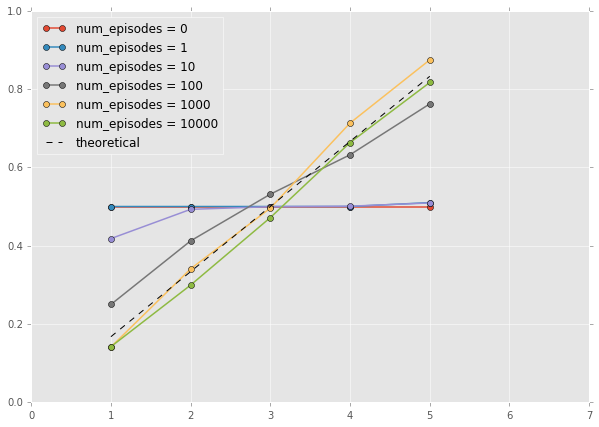

In [47]:
for num_episodes in [0, 1, 10, 100, 1000, 10000]:
    print('working on {0}'.format(num_episodes))
    V = np.repeat(0.5, NUM_STATES)
    # The value of NONE_STATES should be 0
    V[0], V[-1] = 0, 0
    for i in range(num_episodes):
        V = run_a_episode(V, alpha=0.02)
    # V[1:-1] no need to plot value of NONE_STATES
    plt.plot(range(1, 5 + 1), V[1:-1], 'o-', lw=1.5,
             label='num_episodes = {0}'.format(num_episodes))

# plot theorectical line
plt.plot(range(1, 5 + 1), V_TRUE, '--', color='black',
         label='theoretical')

plt.legend(loc='best')
plt.xlim(0, NUM_STATES)
plt.ylim(0, 1)

Interestingly, when alpha=0.1, 100 episodes seem to generate the best line, doing it even for more episodes doesn't seem to get closer to the theoretical values further.

Decreasing alpha to 0.03 makes it much converge better!

## See how RMS changes along number of episodes

In [24]:
mean_squared_error(V_TRUE, V[1:-1])

0.049388888888888892

working on 0.01
working on 0.05
working on 0.1
working on 0.2


(-0.01, 0.059999999999999998)

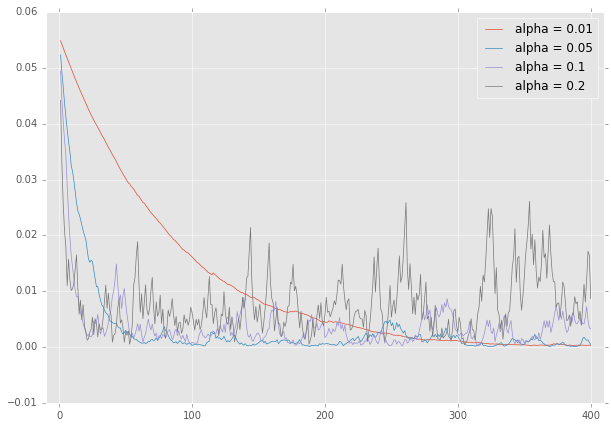

In [48]:
num_episodes = 400
for alpha in [0.01, 0.05, 0.1, 0.2]:
# for alpha in [0.01, 0.05]:
    print('working on {0}'.format(alpha))
    V = np.repeat(0.5, NUM_STATES)
    rms = []
    # The value of NONE_STATES should be 0
    V[0], V[-1] = 0, 0
    for i in range(num_episodes):
        V = run_a_episode(V, alpha=alpha)
#         V = run_a_episode(V)
        rms.append(mean_squared_error(V_TRUE, V[1:-1]))

    plt.plot(np.arange(num_episodes) + 1, rms, lw=0.7,
             label='alpha = {0}'.format(alpha))
    
plt.legend(loc='best')
plt.xlim(-10, num_episodes + 10)
plt.ylim(-0.01, plt.ylim()[1])

Larger alpha makes it hard to converge

#### Inspect a single alpha value for a much longer period

working on 0.02


(-0.01, 0.059999999999999998)

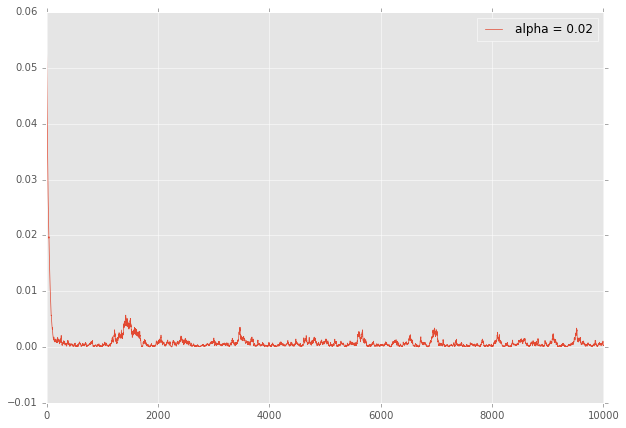

In [49]:
num_episodes = 10000
for alpha in [0.02]:
    print('working on {0}'.format(alpha))
    V = np.repeat(0.5, NUM_STATES)
    rms = []
    # The value of NONE_STATES should be 0
    V[0], V[-1] = 0, 0
    for i in range(num_episodes):
        V = run_a_episode(V, alpha=alpha)
#         V = run_a_episode(V)
        rms.append(mean_squared_error(V_TRUE, V[1:-1]))

    plt.plot(np.arange(num_episodes) + 1, rms, lw=0.7,
             label='alpha = {0}'.format(alpha))
    
plt.legend(loc='best')
plt.xlim(-10, num_episodes + 10)
plt.ylim(-0.01, plt.ylim()[1])

# Monte Carlo (MC) Methods

todo